In [2]:
import pandas as pd

In [3]:
from quoptuna import DataPreparation, Optimizer

In [20]:
db_name = "Statlog"
study_name = "Statlog"
optimizer = Optimizer(db_name=db_name, study_name=study_name)

In [21]:
optimizer.storage_location

'sqlite:///db/Statlog.db'

In [22]:
optimizer.load_study()
study = optimizer.study

In [23]:
best_trial = study.best_trials

In [24]:
def format_trial(trial):
    quantum_f1_score = trial.user_attrs.get("Quantum_f1_score")
    classical_f1_score = trial.user_attrs.get("Classical_f1_score")
    f1_score = (
        quantum_f1_score
        if quantum_f1_score != 0
        else classical_f1_score
        if classical_f1_score != 0
        else "N/A"
    )
    return f"Trial {trial.number} - F1 Score: {f1_score} {trial.params.get('model_type')}"

In [25]:
for trial in best_trial:
    print(format_trial(trial))

Trial 44 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 45 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 47 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 48 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 49 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 51 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 52 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 53 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 54 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 55 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 56 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 61 - F1 Score: 0.9124423963133641 DressedQuantumCircuitClassifierSeparable
Trial 62 - F1 Score: 0.91244

In [29]:
model_params = best_trial[0].params
model_params

{'max_vmap': 1,
 'batch_size': 32,
 'learning_rate': 0.1,
 'n_input_copies': 1,
 'n_layers': 1,
 'observable_type': 'full',
 'repeats': 5,
 'C': 10,
 'gamma_factor': 10,
 'trotter_steps': 1,
 't': 0.1,
 'n_qfeatures': 'half',
 'n_episodes': 100,
 'visible_qubits': 'single',
 'temperature': 100,
 'encoding_layers': 10,
 'degree': 2,
 'n_qchannels': 1,
 'qkernel_shape': 3,
 'kernel_shape': 3,
 'filter_name': 'edge_detect',
 'gamma': 0.1,
 'alpha': 0.01,
 'hidden_layer_sizes': '[100,)',
 'eta0': 10,
 'model_type': 'DressedQuantumCircuitClassifierSeparable'}

In [30]:
file_path = "data/Statlog.csv"
data = pd.read_csv(file_path)
data

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,target
0,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,-1
1,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,-1
2,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,-1
3,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,1,31.57,10.500,2,14,4,6.500,1,0,0,0,2,0,1,1
686,1,20.67,0.415,2,8,4,0.125,0,0,0,0,2,0,45,-1
687,0,18.83,9.540,2,6,4,0.085,1,0,0,0,2,100,1,1
688,0,27.42,14.500,2,14,8,3.085,1,1,1,0,2,120,12,1


In [31]:
dp = DataPreparation(
    file_path=file_path, x_cols=list(data.columns.difference(["target"])), y_col="target"
)
data_dict = dp.get_data()

In [32]:
data_dict.keys()

dict_keys(['x_train', 'x_test', 'y_train', 'y_test'])

In [33]:
from quoptuna.backend.models import create_model

model = create_model(**model_params)

In [34]:
model.fit(data_dict["x_train"].values, data_dict["y_train"].values)

c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\pennylane\devices\default_qubit_jax.py:173: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\pennylane\devices\default_qubit_legacy.py:211: PennyLaneDeprecationWarning: Use of 'default.qubit.jax' is deprecated. Instead, use 'default.qubit', which supports backpropagation. If you experience issues, reach out to the PennyLane team on the discussion forum: https://discuss.pennylane.ai/
  warnings.warn(
INFO:root:Model DressedQuantumCircuitClassifierSeparable converged after 572 steps.


DressedQuantumCircuitClassifierSeparable(learning_rate=0.1, max_vmap=1,
                                         n_layers=1)

In [43]:
from quoptuna import XAI
from quoptuna.backend.xai.xai import XAIConfig

config = XAIConfig(use_proba=True, onsubset=True, subset_size=50)
xai = XAI(model=model, data=data_dict, config=config)
xai.get_report()

c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
c:\Users\aneen\Documents\GitHub\quoptuna\.venv\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


{'confusion_matrix': array([[55, 11],
        [ 8, 99]], dtype=int64),
 'classification_report': '              precision    recall  f1-score   support\n\n          -1       0.87      0.83      0.85        66\n           1       0.90      0.93      0.91       107\n\n    accuracy                           0.89       173\n   macro avg       0.89      0.88      0.88       173\nweighted avg       0.89      0.89      0.89       173\n',
 'roc_curve': 'y should be a 1d array, got an array of shape (173, 2) instead.'}

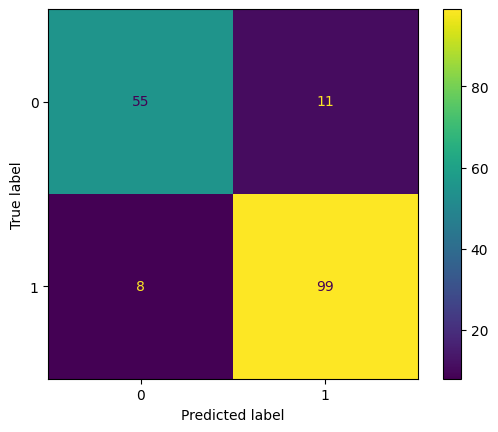

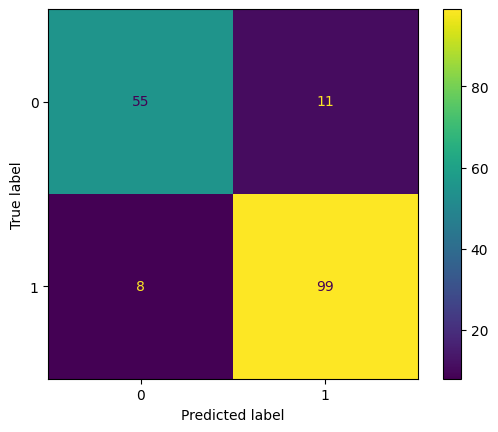

In [ ]:
xai.plot_confusion_matrix()

In [45]:
xai.explainer.feature_names

['A1',
 'A10',
 'A11',
 'A12',
 'A13',
 'A14',
 'A2',
 'A3',
 'A4',
 'A5',
 'A6',
 'A7',
 'A8',
 'A9']

''
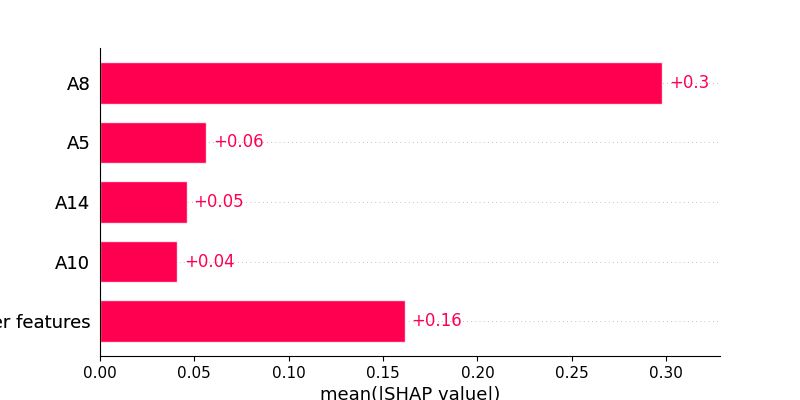

In [53]:
xai.get_plot("bar", max_display=5, class_index=1)